In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dati_fin.csv', sep=';')

In [3]:
# rindu un kolonu skaits
data.shape

(2628, 17)

In [4]:
# Datu tipi
data.dtypes

Darījuma summa, EUR                     float64
Pārdotā zemes kopplatība, m2            float64
Būvju skaits                              int64
Būves virszemes stāvu skaits              int64
Būves apbūves laukums, m2               float64
Būves kopplatība, m2                    float64
Būves būvtilpums, m3                    float64
Būves ekspluatācijas uzsākšanas gads      int64
Būves fiziskais nolietojums, %            int64
Telpu grupas zemākais stāvs               int64
Telpu grupas augstākais stāvs             int64
Telpu grupas platība, m2                float64
Dzīvokļa kopplatība, m2                 float64
Telpu skaits telpu grupā                  int64
Istabu skaits dzīvoklī                    int64
Garums                                  float64
Platums                                 float64
dtype: object

In [5]:
# Vai ir kādas tukšas vērtības
data.isnull().sum()

Darījuma summa, EUR                     0
Pārdotā zemes kopplatība, m2            0
Būvju skaits                            0
Būves virszemes stāvu skaits            0
Būves apbūves laukums, m2               0
Būves kopplatība, m2                    0
Būves būvtilpums, m3                    0
Būves ekspluatācijas uzsākšanas gads    0
Būves fiziskais nolietojums, %          0
Telpu grupas zemākais stāvs             0
Telpu grupas augstākais stāvs           0
Telpu grupas platība, m2                0
Dzīvokļa kopplatība, m2                 0
Telpu skaits telpu grupā                0
Istabu skaits dzīvoklī                  0
Garums                                  0
Platums                                 0
dtype: int64

In [6]:
data.describe()

,"Darījuma summa, EUR","Pārdotā zemes kopplatība, m2",Būvju skaits,Būves virszemes stāvu skaits,"Būves apbūves laukums, m2","Būves kopplatība, m2","Būves būvtilpums, m3",Būves ekspluatācijas uzsākšanas gads,"Būves fiziskais nolietojums, %",Telpu grupas zemākais stāvs,Telpu grupas augstākais stāvs,"Telpu grupas platība, m2","Dzīvokļa kopplatība, m2",Telpu skaits telpu grupā,Istabu skaits dzīvoklī,Garums,Platums
count,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000
mean,69906.966161,109.811476,1.237062,4.579148,1058.463394,4410.045510,15090.025114,1989.656393,15.828006,2.790715,2.826865,60.023478,55.736606,6.377854,2.400685,56.918852,24.295052
std,52838.906805,120.669440,0.776342,1.605394,674.225674,2716.280639,9679.842424,22.954024,14.115871,1.560711,1.539015,25.299337,21.533672,2.029267,0.931020,0.129937,0.265791
min,1000.000000,2.350000,1.000000,1.000000,67.200000,69.900000,276.000000,1900.000000,0.000000,-1.000000,-1.000000,8.400000,8.400000,1.000000,1.000000,56.723056,23.941944
25%,30000.000000,48.425000,1.000000,4.000000,591.600000,2302.975000,7616.250000,1972.000000,0.000000,2.000000,2.000000,44.975000,42.875000,5.000000,2.000000,56.858611,24.047778
50%,55000.000000,81.285000,1.000000,5.000000,885.800000,3724.500000,12726.000000,1984.000000,15.000000,3.000000,3.000000,56.650000,52.800000,6.000000,2.000000,56.875000,24.323611
75%,100000.000000,124.275000,1.000000,5.000000,1432.500000,6568.300000,22674.500000,2008.000000,26.000000,4.000000,4.000000,70.900000,64.900000,8.000000,3.000000,57.076944,24.349722
max,295000.000000,2384.620000,8.000000,10.000000,4488.300000,10097.700000,37744.000000,2023.000000,75.000000,9.000000,9.000000,250.600000,204.400000,19.000000,7.000000,57.261944,24.857778


In [7]:
corr = data.corr()
corr.shape

(17, 17)

<Axes: >

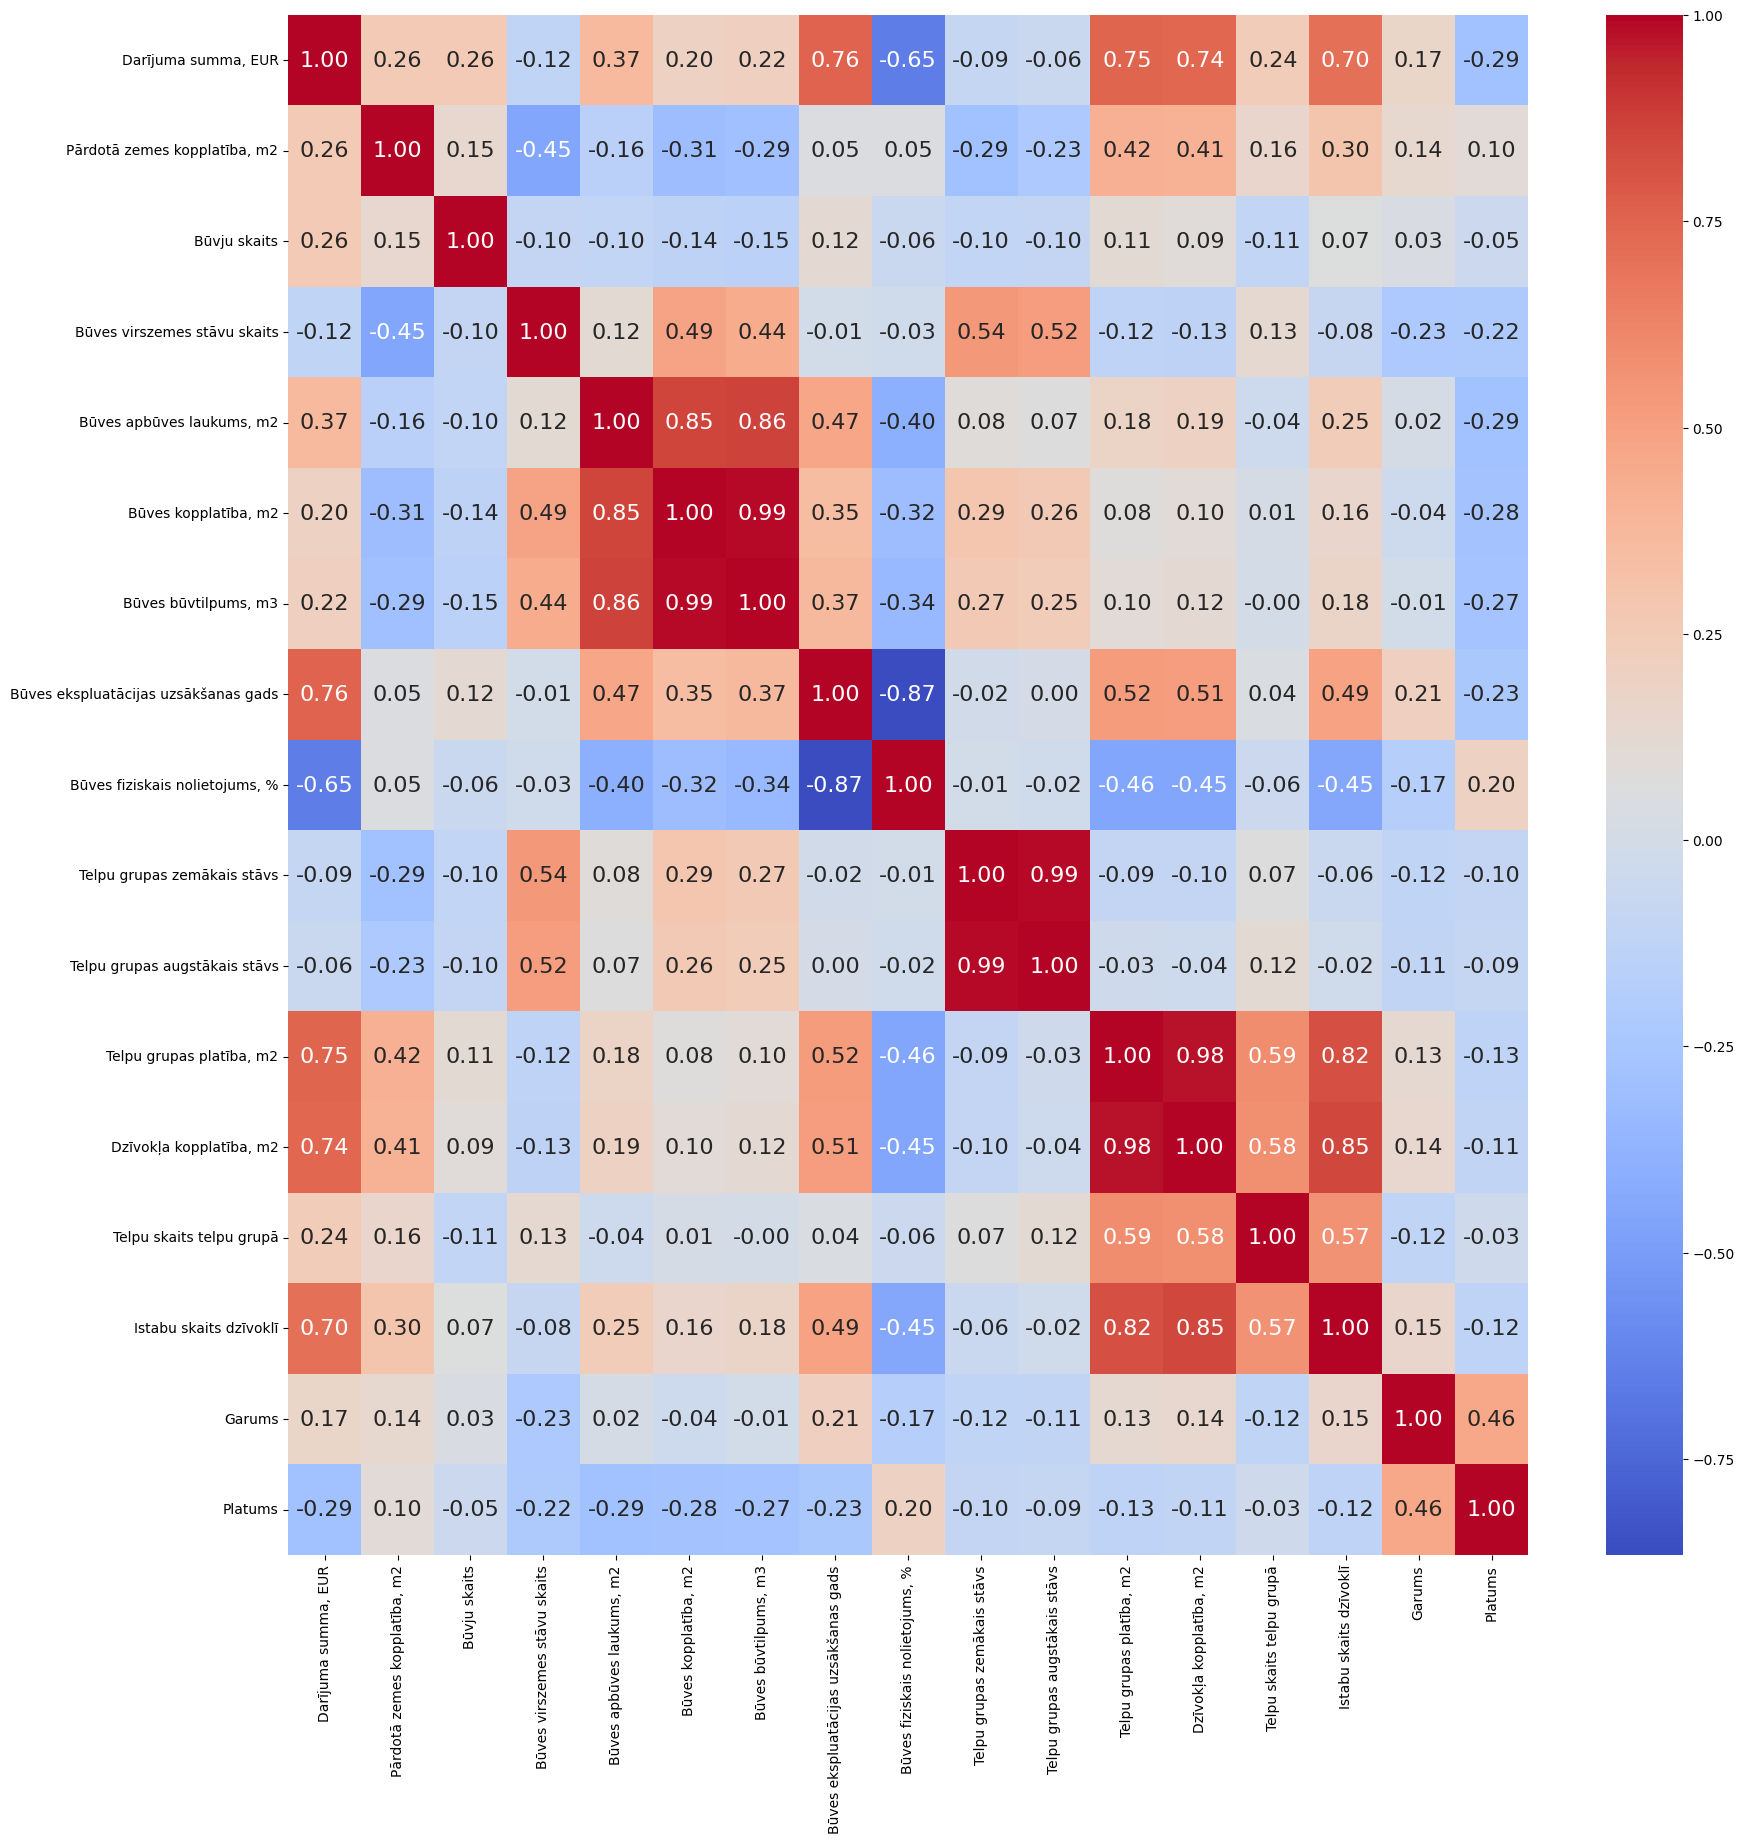

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={'size':16}, cmap='coolwarm')

In [9]:
# Izveido jaunu kolonu 'Telpu grupas vidējais stāvs'
data['Telpu grupas vidējais stāvs'] = (data['Telpu grupas zemākais stāvs'] + data['Telpu grupas augstākais stāvs']) / 2

In [ ]:
del_col = ['Būves apbūves laukums, m2', 'Būves būvtilpums, m3', 'Telpu grupas augstākais stāvs', 'Telpu grupas zemākais stāvs', 'Dzīvokļa kopplatība, m2']

data = data.drop(columns=del_col)  # No apmācību kopas noņem nevajadzīgās kolonas

In [11]:
corr = data.corr()
corr.shape

(13, 13)

<Axes: >

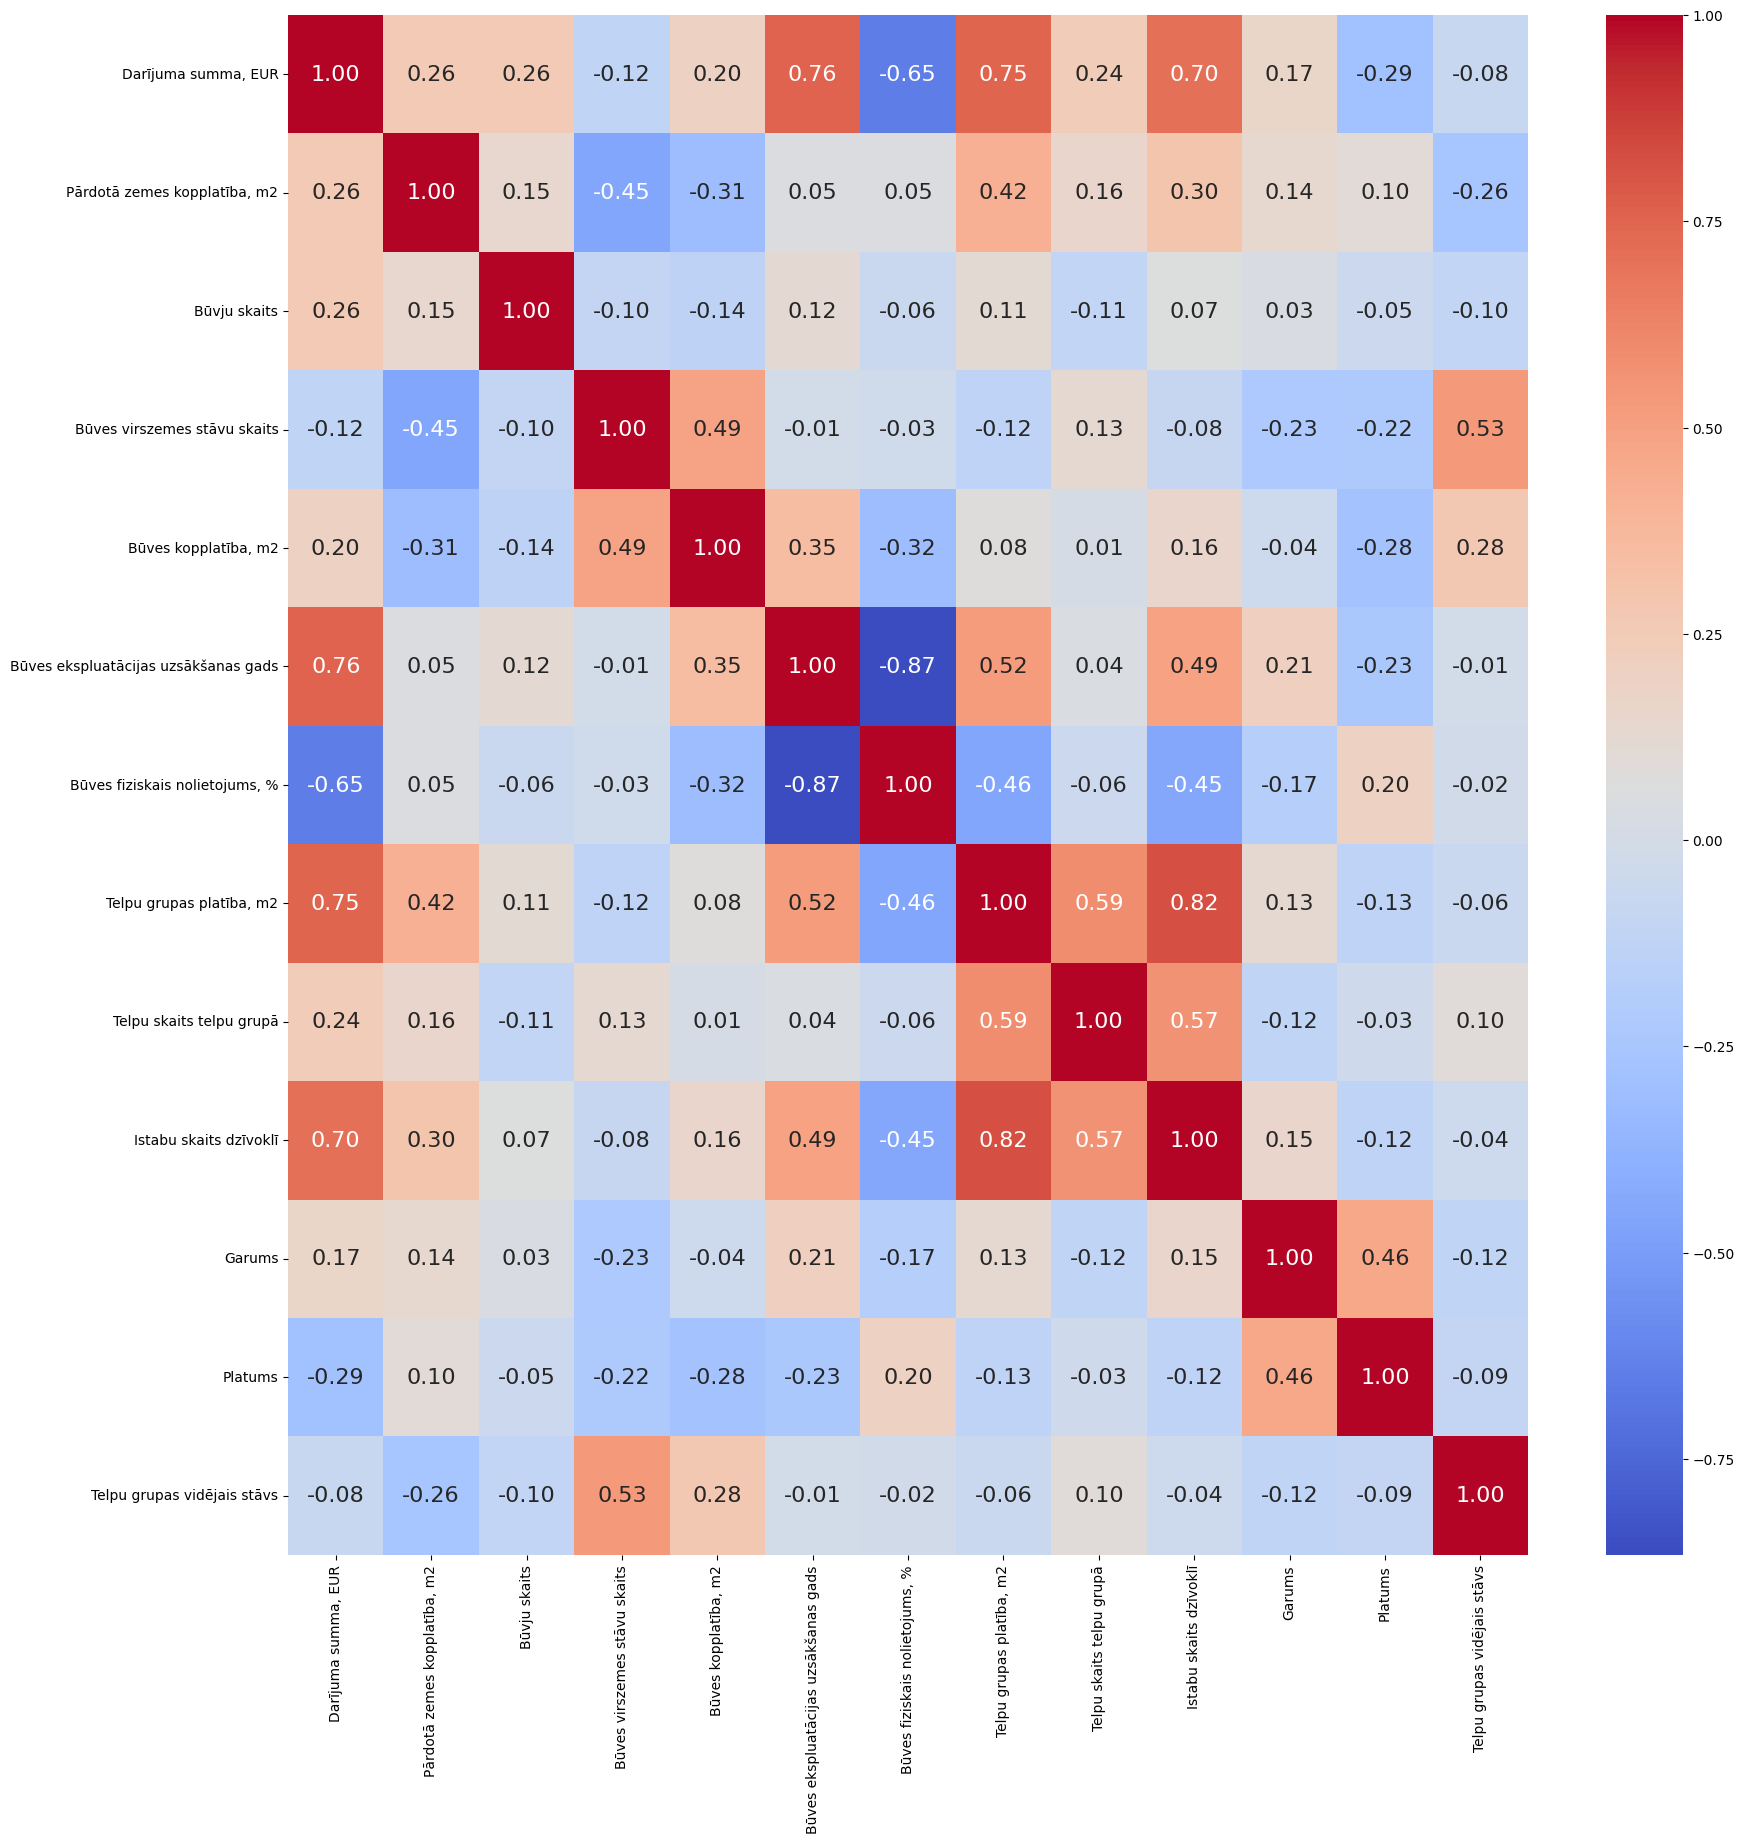

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={'size':16}, cmap='coolwarm')

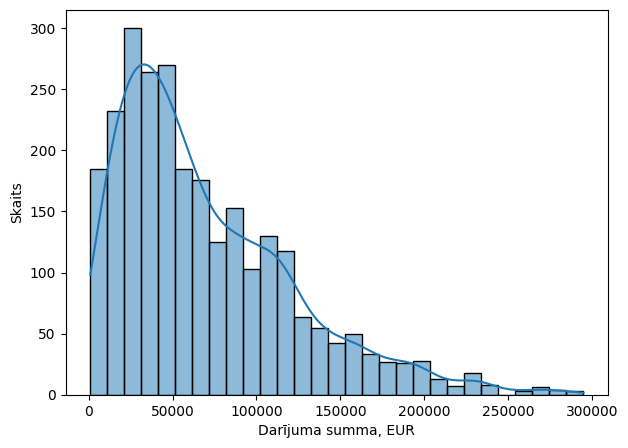

In [ ]:
plt.figure(figsize=(7, 5))
sns.histplot(data=data, x='Darījuma summa, EUR', kde=True)
plt.ylabel('Skaits')
plt.show()

In [14]:
# Pielieoto logaritmisko tranformaciju
data['Darījuma summa, EUR'] = np.log1p(data['Darījuma summa, EUR'])

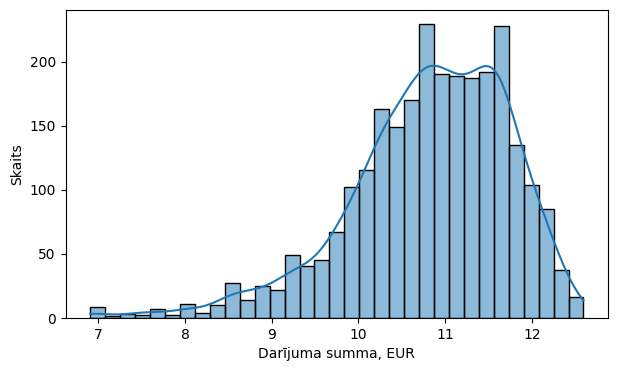

In [ ]:
plt.figure(figsize=(7, 4))
sns.histplot(data=data, x='Darījuma summa, EUR', kde=True)
plt.ylabel('Skaits')
plt.show()